# Controls charts&mdash;individuals and moving range (XmR)

# In brevi

Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DRld4MndVT2R0dEk). It consists of a "Date" column and an "X" column of floats or integers. Dates are entered using [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) date format (yyyy-mm-dd).

# Methodology

The charts presented here are the individuals and moving range control charts, also called XmR or ImR. The data are collected using rational samples. The individual values (sample size is one) are plotted in time order. A central line (average) and control limits above and below the central line are plotted.


# Control chart formulae

## Individuals chart (X)

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range subgroup size 2.

## Moving range chart (mR)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of sugroup size.

In [1]:
# Import the required libraries and modules.
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in column X.
# Set "date" as the index.
#chart_data = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')
chart_data = pd.read_csv('xmr.csv')

In [3]:
# Define for the X chart the graph title and subtitle, and the x and y axis labels.
x_chart_title = 'Individuals Control Chart'
x_chart_subtitle = 'Travel Cost'
x_chart_ylabel = 'Travel Cost (USD)'
x_chart_xlabel = 'Date'
subgroup_size = 2

In [4]:
# Determine d2 and d3 constants.
constants = pd.read_csv('control_chart_constants.csv')
d_two = constants['d2'][constants['n'] == subgroup_size].values[0]
d_three = constants['d3'][constants['n'] == subgroup_size].values[0]

In [5]:
# Define for the mR chart the graph title and subtitle, and the x and y axis labels.
mr_chart_title = 'Moving Range Control Chart'
mr_chart_subtitle = 'Travel Cost Difference'
mr_chart_ylabel = 'Travel Cost Moving Range (USD)'
mr_chart_xlabel = 'Date'

In [6]:
# Moving range chart statistics
# Calculate average range.
average_moving_range = (chart_data['X'].rolling(2) \
                                       .agg(lambda x: x[0] - x[1]) \
                                       .abs()) \
                                       .mean()
# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_moving_range + average_moving_range * 3 * \
                                  d_three / d_two
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_moving_range - average_moving_range * 3 * \
                                  d_three / d_two
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0

In [7]:
# X chart statistics
# Calculate the average of all values.
average = chart_data['X'].mean()
# Calculate the individual chart upper control limit.
individual_chart_upper_control_limit = average + 3 * average_moving_range / d_two
# Calculate the individual chart lower control limit.
individual_chart_lower_control_limit = average - 3 * average_moving_range / d_two

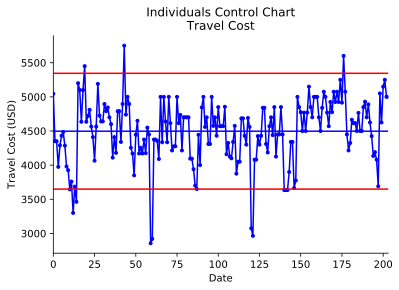

In [8]:
# Create a graph of "individual values v. date".
ax = chart_data[['X']].plot.line(legend=False, marker='o', markersize=3, color='blue')
ax.axhline(y=average, color='b')
ax.axhline(y=individual_chart_upper_control_limit, color='r')
ax.axhline(y=individual_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
    ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('x.svg', format='svg')
ax.figure.savefig('x.pdf', format='pdf')

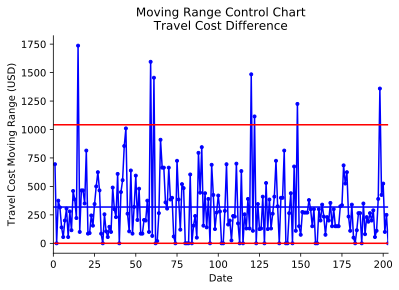

In [9]:
# Create a graph of "moving range values v. date".
ax = chart_data['X'].rolling(2) \
               .agg(lambda x: x[0] - x[1]) \
               .abs() \
               .plot.line(legend=False, marker='o', markersize=3, color='blue')
ax.axhline(y=average_moving_range, color='b')
ax.axhline(y=range_chart_upper_control_limit, color='r')
ax.axhline(y=range_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(mr_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(mr_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('mr.svg', format='svg')
ax.figure.savefig('mr.pdf', format='pdf')

# Descriptive statistics

## Individuals control chart

In [10]:
print('Upper control limit',
      individual_chart_upper_control_limit,
      sep=' = ')
print('Average',
      average,
      sep=' = ')
print('Lower control limit',
      individual_chart_lower_control_limit,
      sep=' = ')

Upper control limit = 5344.71032551
Average = 4496.80392157
Lower control limit = 3648.89751763


## Moving range control chart

In [11]:
print('Upper control limit',
      range_chart_upper_control_limit,
      sep=' = ')
print('Average moving range',
      average_moving_range,
      sep=' = ')
print('Lower control limit',
      range_chart_lower_control_limit,
      sep=' = ')

Upper control limit = 1041.65301724
Average moving range = 318.812807882
Lower control limit = 0


# Interpretation

## Moving range control chart

## Individuals control chart

#  Development

- Add text for Shewhart's or Nelson's Rules; define the rules
- How do I determine T or F for each rule; loc or iloc
- Code for rule 1

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.